In [36]:
from numpy import *
import numpy as np
from numpy import polyfit
import scipy as sp
from scipy import signal

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

from IPython.display import HTML
from IPython.display import Image

from datetime import date
import time

import pandas as pd
import csv
import os
import decimal
import string
import imp
import sys
AgilentSCPI = imp.load_source('AgilentSCPI', 'c:/Users/Jacob/Nonlinearity/Codes/AgilentSCPI.py')

In [37]:
pathbase='c:/Users/Jacob/Nonlinearity/Data/Cement_sample_wt_sand/sample3/O2/2021-03-25_03/Trial1/'
Folder_Name = os.listdir(pathbase)
print(Folder_Name)
%run c:/Users/Jacob/Nonlinearity/Codes/ComputeDelays.py
FILE_NAME = '10.0V'

delaystep=1
start=49
stop=52
delay_scale_fact=1 #If you've named the files with some scaling factor so ppX.csv is for delay x/10 then set 
    #                   the scale factor to 10
start_name=1


['.DS_Store', '10.0V']


In [38]:
class timedata:

    def __init__(self, name):
        self.name = name
        self.time = np.array    # creates a new empty list
        self.data = np.array    # creates a new empty list

#print(time.ctime())

In [39]:
def readlabdat(fname,dataset):
# read in data from the scope and make a matrix of values from it
    
    f = open(fname,'r')
    header1=f.readline()
    header2=f.readline()
    header3=f.readline()
    header4=f.readline()
 
    tmp1=[]
    tmp2=[]
    
    for line in f:

        columns = line.split(',')
        tmp1.append(float(columns[0]))
        tmp2.append(float(columns[1]))
    
    Directory_=fname
    #print(Directory_)
    dataset.time=np.asarray(tmp1)
    dataset.data=np.asarray(tmp2)
    f.close()
    
#print(time.ctime()) 

49


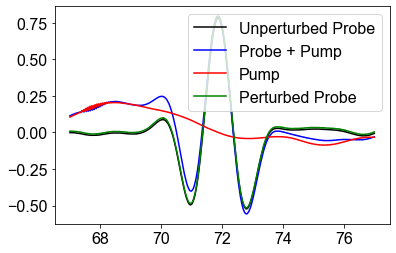

50


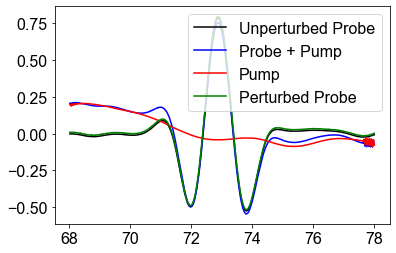

51


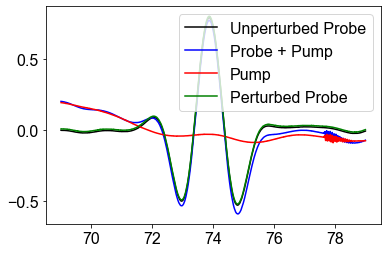

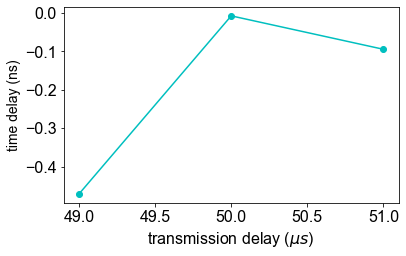

In [40]:
#for name in Folder_Name[1:3]:  #should start from 1 like:[1:]
name= FILE_NAME
path=pathbase+str(name)+'/'#+"/Removed_Lines/"
print_directory=path+"/0_RESULTS/"
#tshifts2=Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,
#                                    winlen,recompute,flipdelays=flipdelays)

delayvec = np.arange(start, stop, delaystep, dtype)

for timedelays in delayvec:
    print(timedelays)
    #timedelays= int(timedelays)
    timedelays= timedelays
    fname_root=path
    #print fname_root
    # probe: black signal
    prdat=timedata('prdat') 
    readlabdat(fname_root+"pr"+str(timedelays)+".csv",prdat)
    plt.plot(prdat.time*1e6,prdat.data,'k',label="Unperturbed Probe")
    
    
    #pump and probe: blue signal
    ppdat=timedata('ppdat')
    readlabdat(fname_root+"pp"+str(timedelays)+".csv",ppdat)
    plt.plot(ppdat.time*1e6,ppdat.data,'b',label="Probe + Pump")
    
    
    # pump: red signal
    pudat=timedata('pudat')
    readlabdat(fname_root+"pu"+str(timedelays)+".csv",pudat)
    plt.plot(ppdat.time*1e6,pudat.data,'r',label="Pump")
    
    if timedelays == start:
        s_wave=[[ppdat.time*1e6],[pudat.data]]
    else:
        s_wave= np.concatenate((s_wave,[[ppdat.time*1e6],[pudat.data]]), axis=1)
      
    # (pump and probe signal) - pump: green signal 
    plt.plot(ppdat.time*1e6,ppdat.data-pudat.data,'g',label="Perturbed Probe")
    #plt.xlim((0,300))
    
    plt.legend()
    plt.show()

missing_data=np.array([])#12,21,22,25,26,29,43])
fname_part2=''
fnameend='.csv'

winlen=60e-6  #window over which the cross-correlation is computed
recompute=1 #recompute=0: =1 will recompute the delays (e.g. to change the window length), and save them to 
#           disk (delays.txt) in the same directory as the data.  If this is set to 0 it will only compute the 
#           delays if it doesn't find the file delays.txt

tshifts2=shifts('tshifts2')

# With correls
tshifts2, fits, params, correls, lags=Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,
                                   winlen,recompute=recompute,dofilter=0, getCorrels=True)

# Without correls
# tshifts2 =Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,
#                                     winlen,recompute=recompute,dofilter=0)

plt.plot(tshifts2.delays,tshifts2.raw,'co') # actual
plt.plot(tshifts2.delays,tshifts2.remove_noise_wiggles,'c') # smothed
plt.xlabel('transmission delay ($\mu s$)',fontsize=16) 
plt.ylabel('time delay (ns)',fontsize=14)
#plt.legend('1',loc=10,fontsize=12)


plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis labels

figname='Delays.png'
#plt.savefig(print_directory+figname,bbox_inches='tight',dpi=200)

aa = np.asarray(tshifts2.delays)
bb = np.asarray(tshifts2.raw)
cc = np.asarray(tshifts2.remove_noise_wiggles)
merged = np.concatenate(([[aa],[bb],[cc]]))

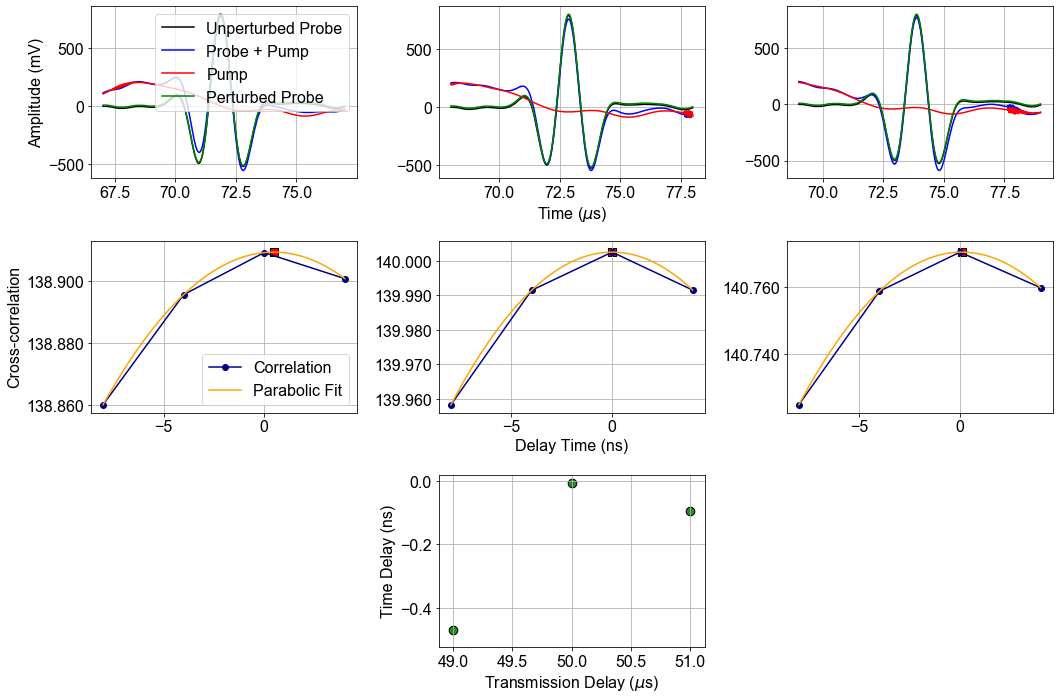

In [41]:
ncols = 3
nrows = 3
fig, ax = plt.subplots(ncols, nrows, figsize=(15, 10))

for i, transdelays in zip(range(nrows),delayvec):
    fname_root=path
    
    prdat=timedata('prdat') 
    readlabdat(fname_root+"pr"+str(transdelays)+".csv", prdat)
    ax[0, i].plot(prdat.time*1e6, prdat.data*1e3, 'k', label="Unperturbed Probe")

    ppdat = timedata('ppdat')
    readlabdat(fname_root + "pp" + str(transdelays) + ".csv" , ppdat)
    ax[0, i].plot(ppdat.time * 1e6, ppdat.data * 1e3 ,'b', label="Probe + Pump")

    pudat = timedata('pudat')
    readlabdat(fname_root + "pu" + str(transdelays) + ".csv", pudat)
    ax[0, i].plot(ppdat.time * 1e6, pudat.data * 1e3,'r', label="Pump")

    if transdelays == start:
        s_wave = [[ppdat.time*1e6], [pudat.data*1e6]]
    else:
        s_wave = np.concatenate((s_wave, [[ppdat.time*1e6], [pudat.data*1e3]]), axis=1)
    ax[0, i].plot(ppdat.time*1e6, ppdat.data*1e3-pudat.data*1e3, 'g', label="Perturbed Probe")
    ax[0, i].grid()
    ax[0, 0].legend()
    ax[0, 1].set_xlabel('Time ($\mu$s)', fontsize=16)
    ax[0, 0].set_ylabel('Amplitude (mV)', fontsize=16)

for i, correl, fit, param, lag in zip(range(nrows), correls, fits, params, lags):
    xx = np.linspace(min(lag), max(lag), 1000)
    fitCurve = np.poly1d(fit)
    MaxPeak_from_interpolation=-param[1]/2/param[0]
    ax[1, i].plot(lag*1e9, correl, '-o', label='Correlation', color='navy')
    ax[1, i].plot(xx*1e9, fitCurve(xx), label='Parabolic Fit', color='orange')
    ax[1, i].scatter(MaxPeak_from_interpolation*1e9, fitCurve(MaxPeak_from_interpolation), marker='s', s=50, color='r', edgecolors='k')
    ax[1, i].ticklabel_format(useOffset=False)
    ax[1, i].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.3f}"))
    ax[1, i].grid()
    ax[1, 1].set_xlabel('Delay Time (ns)', fontsize=16)
    ax[1, 0].set_ylabel('Cross-correlation', fontsize=16)
    ax[1, 0].legend()
    
for fit, param, lag, transdelays in zip(fits, params, lags, delayvec):
    xx = np.linspace(min(lag), max(lag), 1000)
    fitCurve = np.poly1d(fit)
    MaxPeak_from_interpolation=-param[1]/2/param[0]
    ax[2, 1].scatter(transdelays, MaxPeak_from_interpolation*-1e9, s=75, color='forestgreen', edgecolors='k')
    ax[2, 1].ticklabel_format(useOffset=False)
    ax[2, 1].set_xlabel('Transmission Delay ($\mu$s)', fontsize=16)
    ax[2, 1].set_ylabel('Time Delay (ns)', fontsize=16)
    ax[2, 1].grid()
    
fig.delaxes(ax[2, 0])
fig.delaxes(ax[2, 2])
plt.tight_layout()
# plt.savefig('../Images/Set-up/Cross-correlation-setup.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()